In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# import all classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import brier_score_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('Debernardi et al 2020 data.csv')
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [4]:
df.shape

(590, 14)

In [5]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [6]:

cols = df.columns.to_list()
df.diagnosis = df.diagnosis == 3
df.sex = df.sex.map({'M': 1, 'F': 0})
df = df[['creatinine',
         'plasma_CA19_9',
         'age',
         'sex',
         'LYVE1',
         'REG1B',
         'TFF1',
         'diagnosis']].copy()
## Turn multiclass problem into binary classification problem, it gives best results (tested but not shown in the final version) ##
df.head(20)

,creatinine,plasma_CA19_9,age,sex,LYVE1,REG1B,TFF1,diagnosis
0,1.83222,11.7,33,0,0.893219,52.94884,654.282174,False
1,0.97266,NaN,81,0,2.037585,94.46703,209.488250,False
2,0.78039,7.0,51,1,0.145589,102.36600,461.141000,False
3,0.70122,8.0,61,1,0.002805,60.57900,142.950000,False
4,0.21489,9.0,62,1,0.000860,65.54000,41.088000,False
5,0.84825,NaN,53,1,0.003393,62.12600,59.793000,False
6,0.62205,NaN,70,1,0.174381,152.27700,117.516000,False
7,0.89349,11.0,58,0,0.003574,3.73000,40.294000,False
8,0.48633,NaN,59,0,0.001945,7.02100,26.782000,False
9,0.61074,24.0,56,0,0.278778,83.92800,19.185000,False


In [7]:
df.isnull().sum()

creatinine         0
plasma_CA19_9    240
age                0
sex                0
LYVE1              0
REG1B              0
TFF1               0
diagnosis          0
dtype: int64

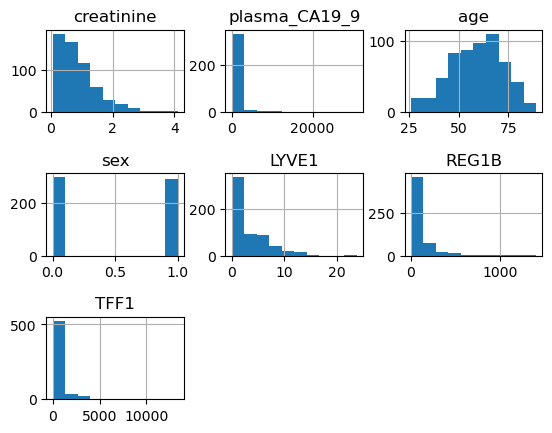

In [8]:
df.hist()
plt.subplots_adjust(hspace=.75)

In [9]:
# diagonis class distribution

df.diagnosis.value_counts()

False    391
True     199
Name: diagnosis, dtype: int64

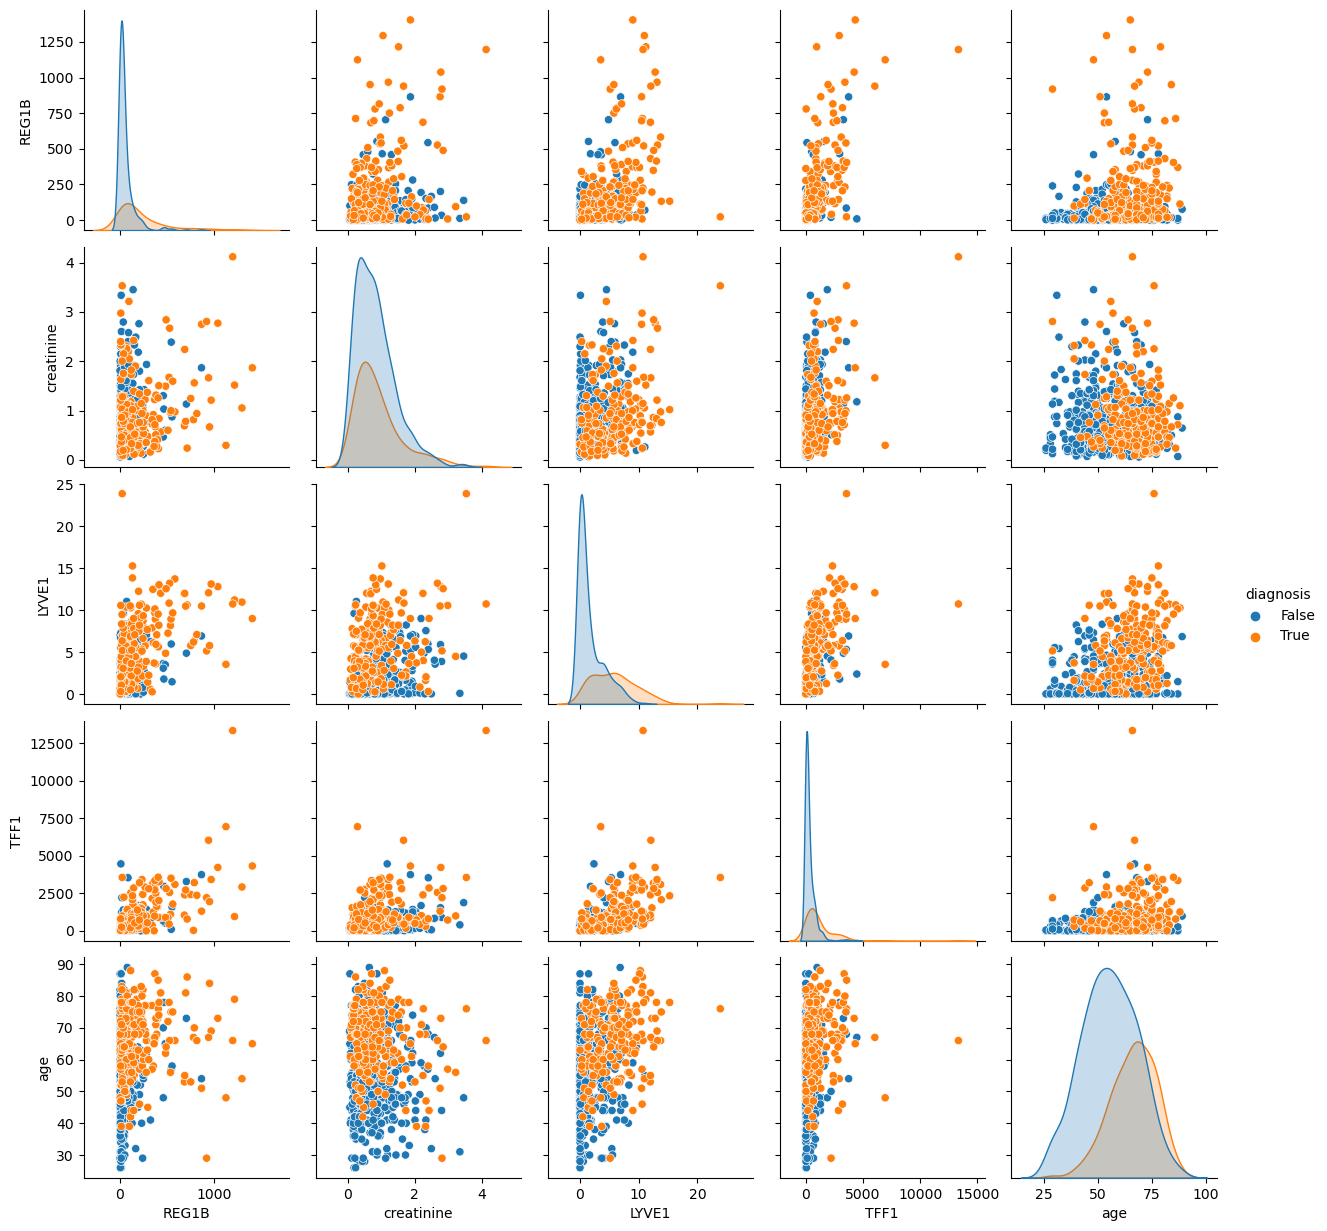

In [10]:
sns.pairplot(data=df, vars=['REG1B',  'creatinine',
             'LYVE1', 'TFF1', 'age'], hue='diagnosis', diag_kind='kde')

<Axes: xlabel='diagnosis', ylabel='TFF1'>

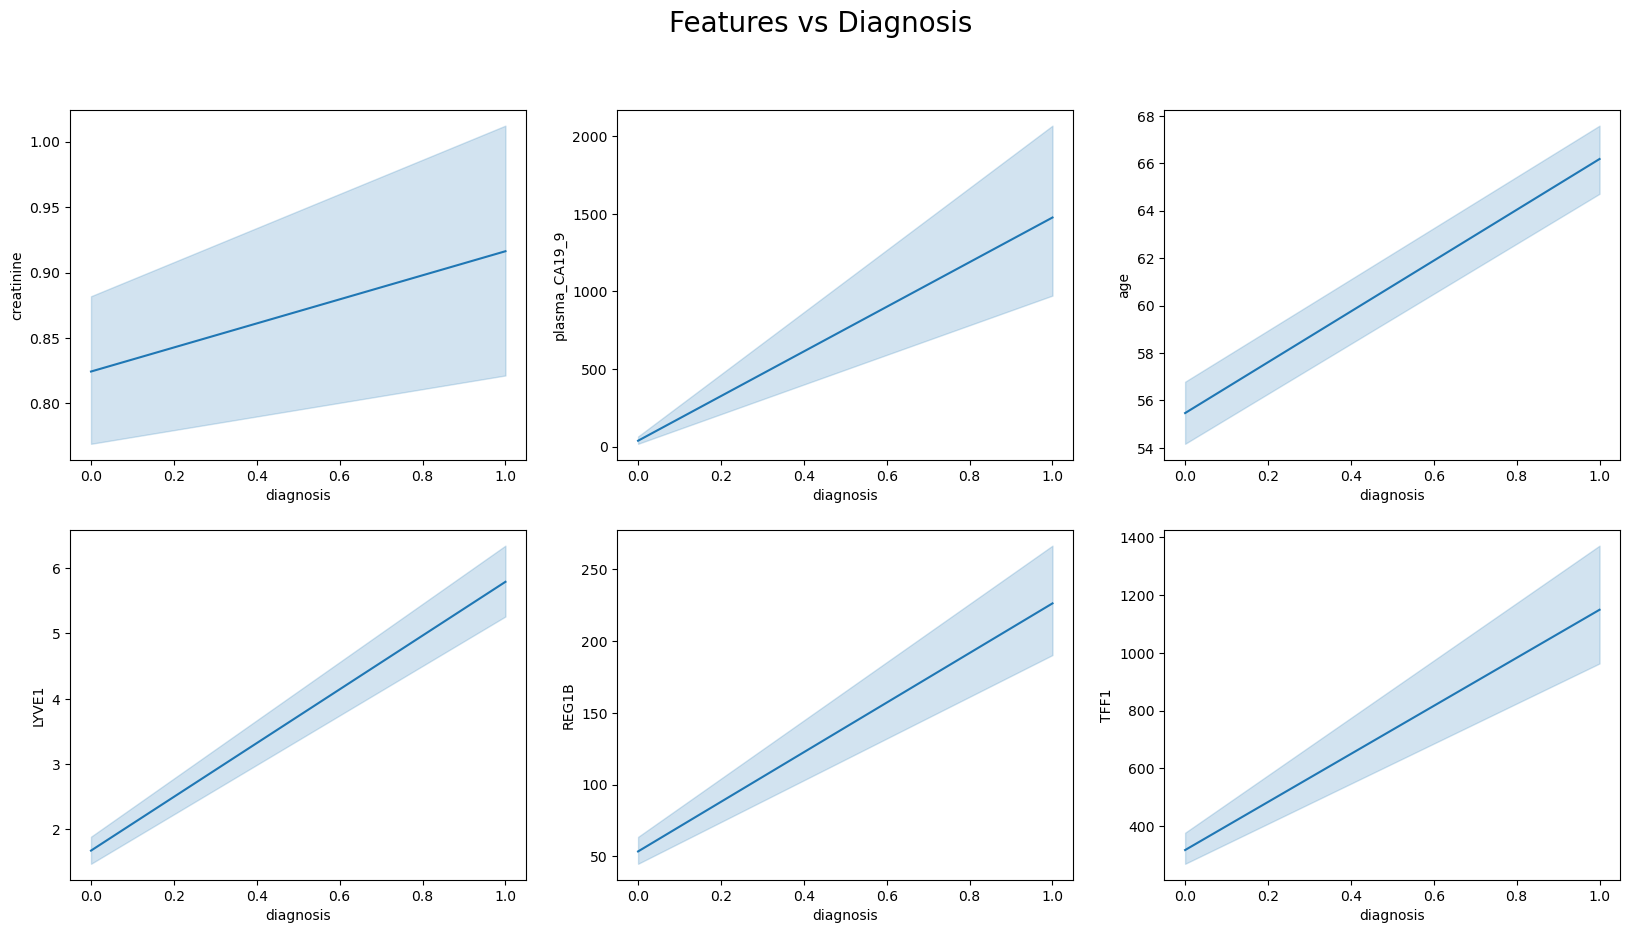

In [11]:
# plot line graph for each feature vs diagnosis

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Features vs Diagnosis', fontsize=20)
sns.lineplot(ax=axes[0, 0], x='diagnosis', y='creatinine', data=df)
sns.lineplot(ax=axes[0, 1], x='diagnosis', y='plasma_CA19_9', data=df)
sns.lineplot(ax=axes[0, 2], x='diagnosis', y='age', data=df)

sns.lineplot(ax=axes[1, 0], x='diagnosis', y='LYVE1', data=df)
sns.lineplot(ax=axes[1, 1], x='diagnosis', y='REG1B', data=df)
sns.lineplot(ax=axes[1, 2], x='diagnosis', y='TFF1', data=df)


<Axes: xlabel='diagnosis', ylabel='count'>

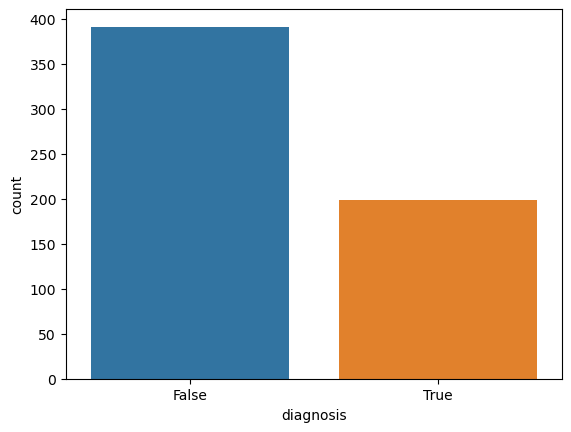

In [12]:
#check imbalance
sns.countplot(x='diagnosis', data=df)

<Axes: >

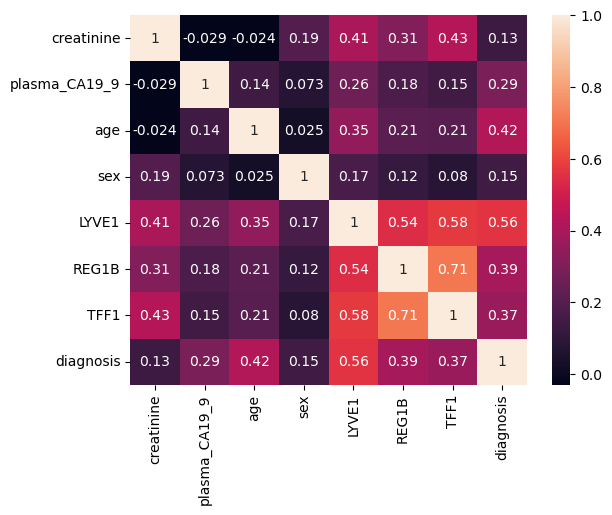

In [13]:
corr = df.dropna().corr()
sns.heatmap(corr, annot=True)

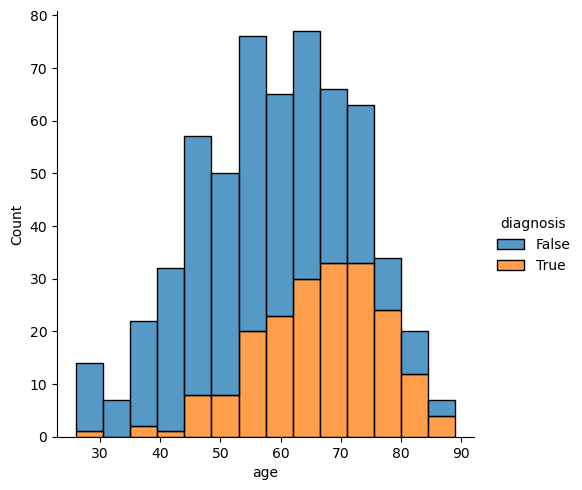

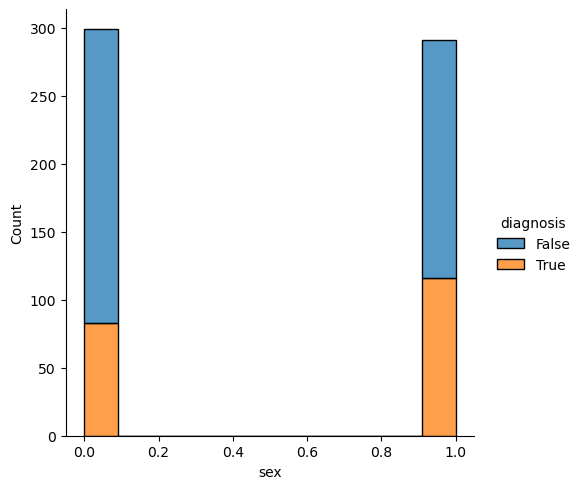

In [14]:
for feature in ['age', 'sex']:
    sns.displot(df, x=feature, hue="diagnosis", multiple='stack')

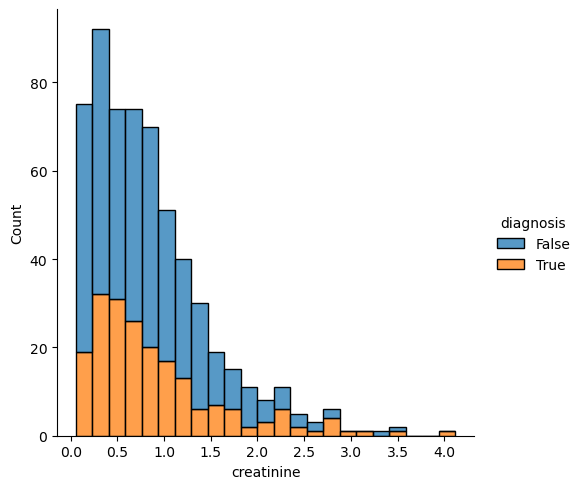

In [15]:
# creatinine vs diagnosis

sns.displot(df, x='creatinine', hue="diagnosis", multiple='stack')

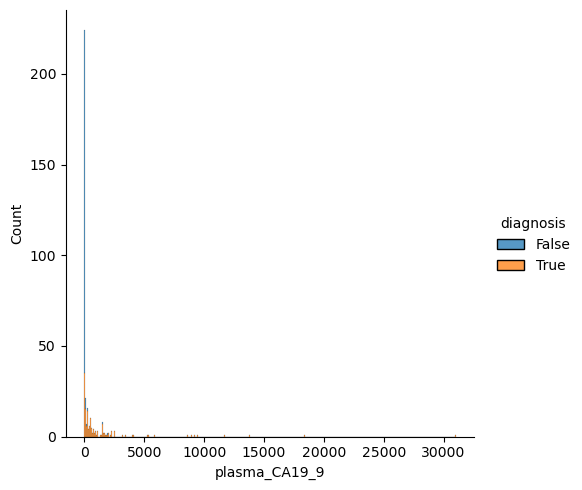

In [16]:
# plasma_CA19_9 vs diagnosis

sns.displot(df, x='plasma_CA19_9', hue="diagnosis", multiple='stack')

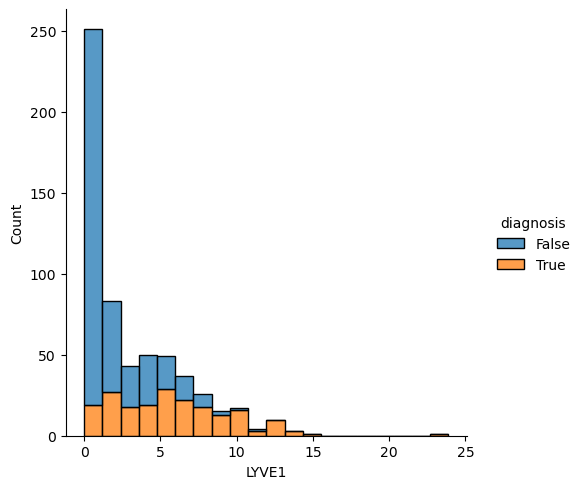

In [17]:
# LYVE1 vs diagnosis

sns.displot(df, x='LYVE1', hue="diagnosis", multiple='stack')

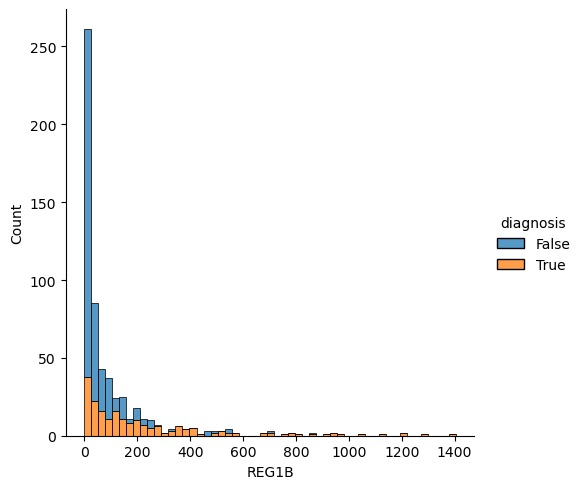

In [18]:
# REG1B vs diagnosis

sns.displot(df, x='REG1B', hue="diagnosis", multiple='stack')

<Axes: xlabel='TFF1', ylabel='Density'>

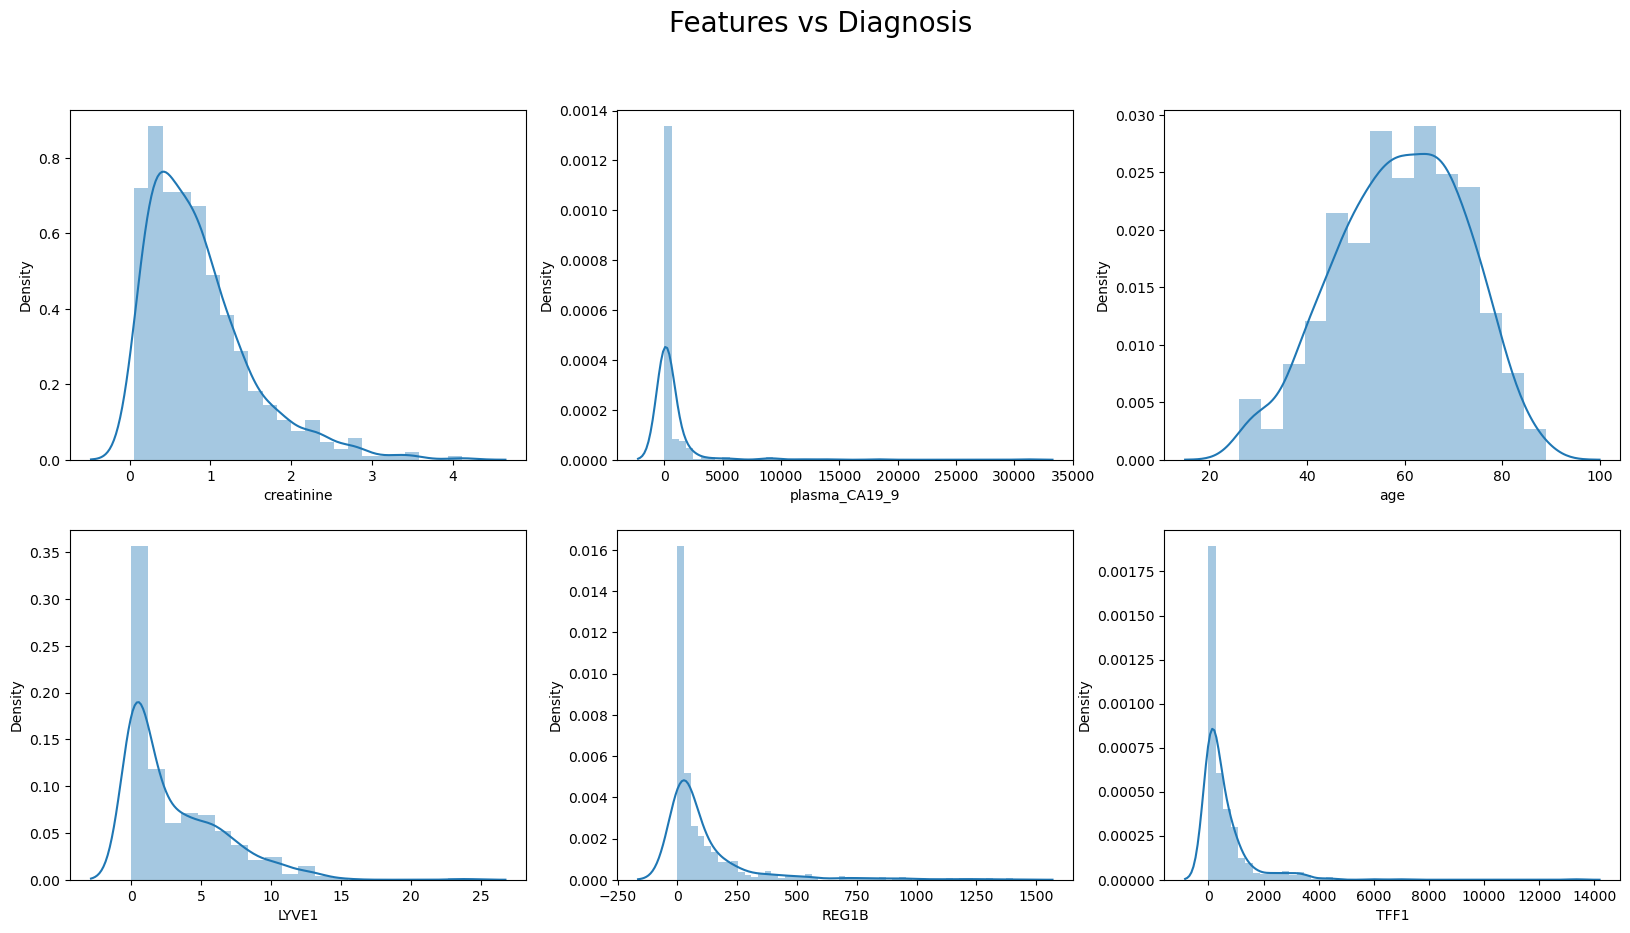

In [19]:
# skewness graph for each feature

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Features vs Diagnosis', fontsize=20)
sns.distplot(df['creatinine'], ax=axes[0, 0])
sns.distplot(df['plasma_CA19_9'], ax=axes[0, 1])
sns.distplot(df['age'], ax=axes[0, 2])

sns.distplot(df['LYVE1'], ax=axes[1, 0])
sns.distplot(df['REG1B'], ax=axes[1, 1])
sns.distplot(df['TFF1'], ax=axes[1, 2])


<Axes: xlabel='diagnosis', ylabel='TFF1'>

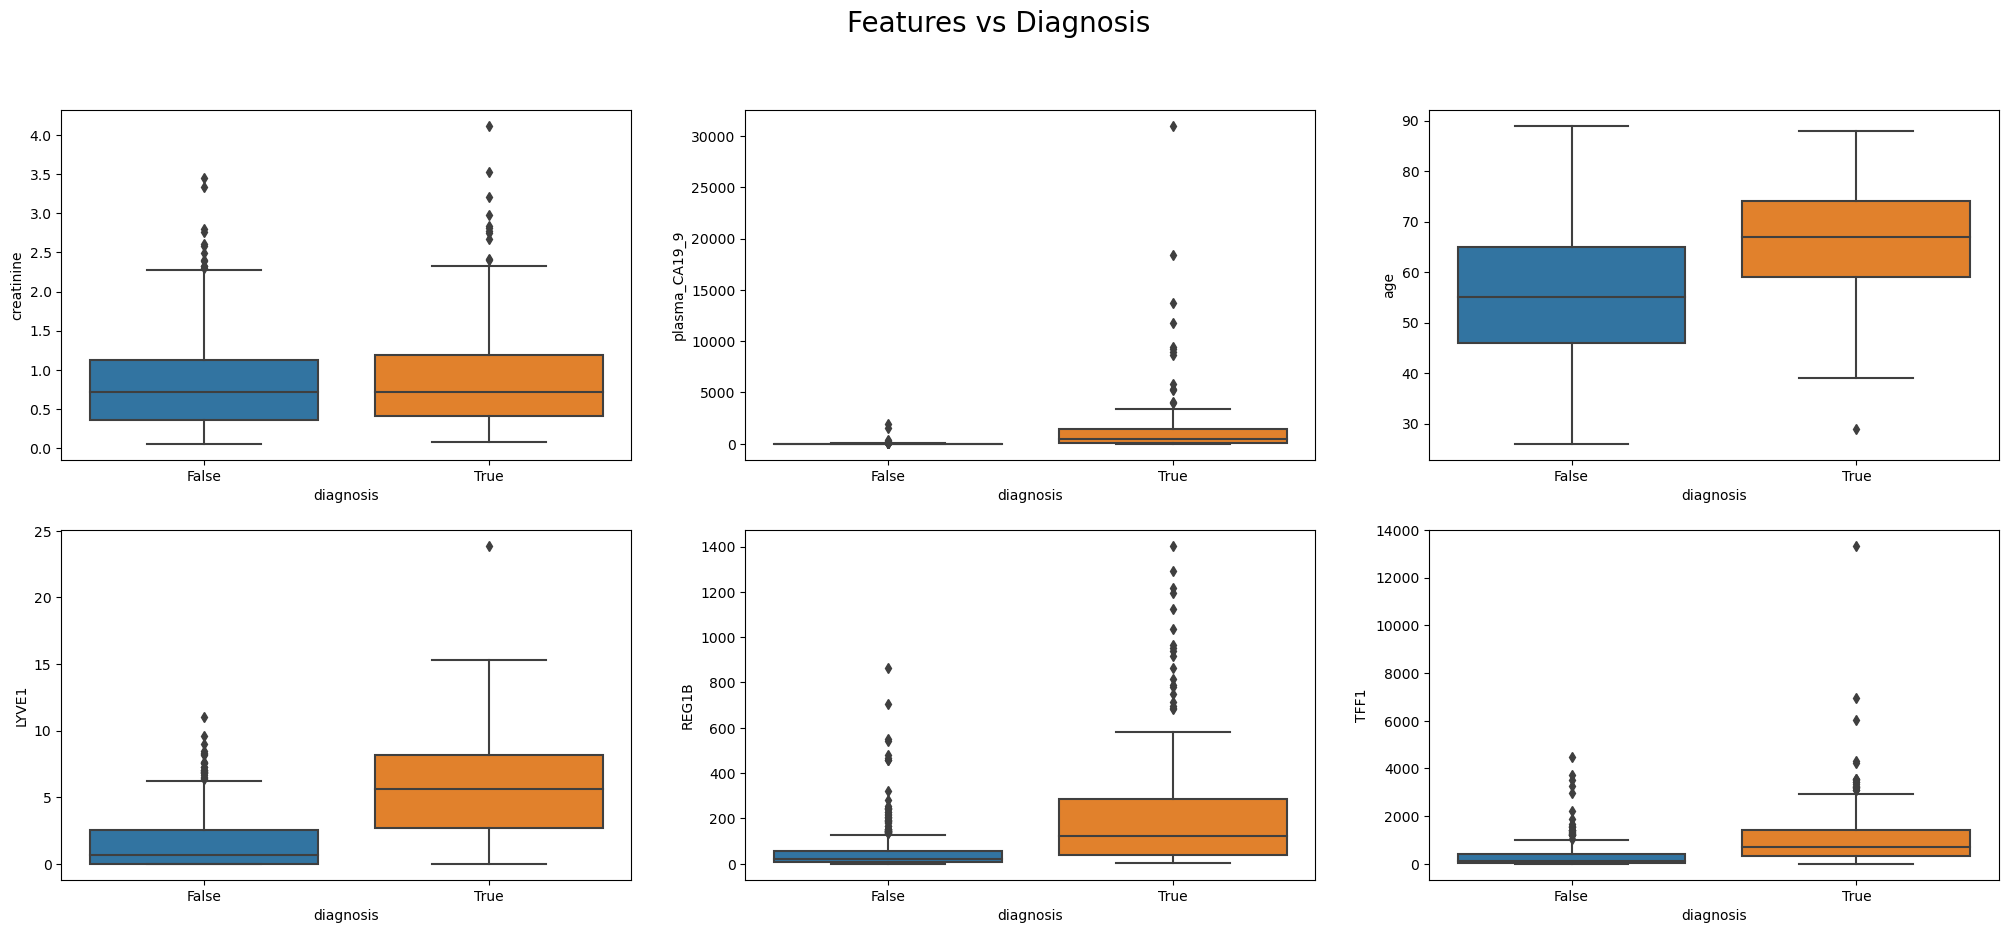

In [20]:

# boxplot for each feature

fig, axes = plt.subplots(2, 3, figsize=(25, 10))
fig.suptitle('Features vs Diagnosis', fontsize=20)
sns.boxplot(ax=axes[0, 0], x='diagnosis', y='creatinine', data=df)
sns.boxplot(ax=axes[0, 1], x='diagnosis', y='plasma_CA19_9', data=df)
sns.boxplot(ax=axes[0, 2], x='diagnosis', y='age', data=df)

sns.boxplot(ax=axes[1, 0], x='diagnosis', y='LYVE1', data=df)
sns.boxplot(ax=axes[1, 1], x='diagnosis', y='REG1B', data=df)
sns.boxplot(ax=axes[1, 2], x='diagnosis', y='TFF1', data=df)


In [21]:
# # impute the missing values with the mean of the column
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(df)
# df = pd.DataFrame(imputer.transform(df), columns=df.columns)

from sklearn.utils import shuffle

In [22]:
df.isnull().sum()

creatinine         0
plasma_CA19_9    240
age                0
sex                0
LYVE1              0
REG1B              0
TFF1               0
diagnosis          0
dtype: int64

In [23]:
# median imputation

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

In [24]:
df = shuffle(df, random_state=42).reset_index(drop=True)

In [25]:

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [26]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)

In [27]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('Accuracy of the Random Forests without Bagging and Boosting',metrics.accuracy_score(prediction,y_test))
print('Accuracy without bagging and boosting ',metrics.accuracy_score(prediction,y_test))
print('Precision without bagging and boosting ',metrics.precision_score(y_test, prediction))
print('Recall without bagging and boosting ',metrics.recall_score(y_test, prediction))
print('F1 without bagging and boosting ',metrics.f1_score(y_test, prediction))
print('Briar score without bagging and boosting ',brier_score_loss(y_test, prediction))




Accuracy of the Random Forests without Bagging and Boosting 0.9213483146067416
Accuracy without bagging and boosting  0.9213483146067416
Precision without bagging and boosting  0.896551724137931
Recall without bagging and boosting  0.8666666666666667
F1 without bagging and boosting  0.8813559322033899
Briar score without bagging and boosting  0.07865168539325842


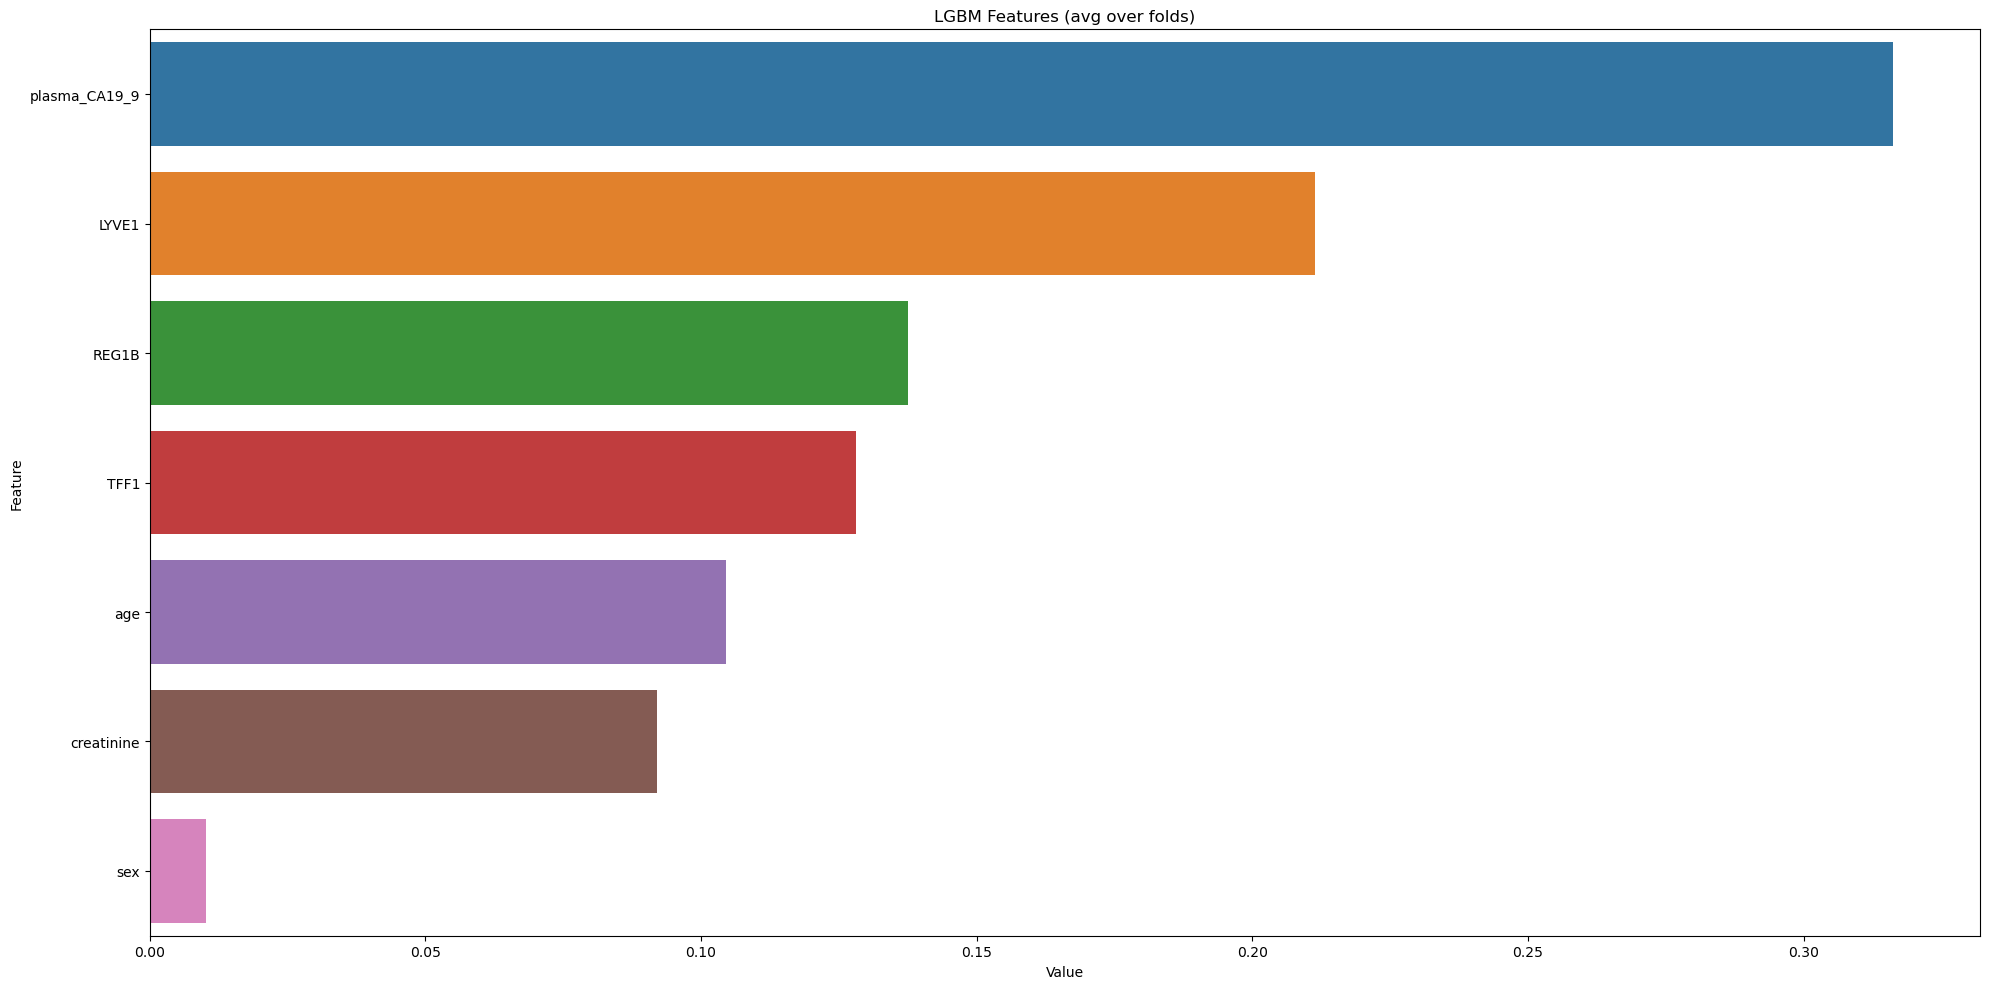

In [28]:

# feature importance

feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns)), columns=['Value', 'Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features (avg over folds)')
plt.tight_layout()
plt.show()


In [29]:
# Calculate and print log loss
from sklearn.metrics import log_loss


logloss = log_loss(y_test, model.predict_proba(X_test))
print('Log Loss:', logloss)

Log Loss: 0.24351326753620955


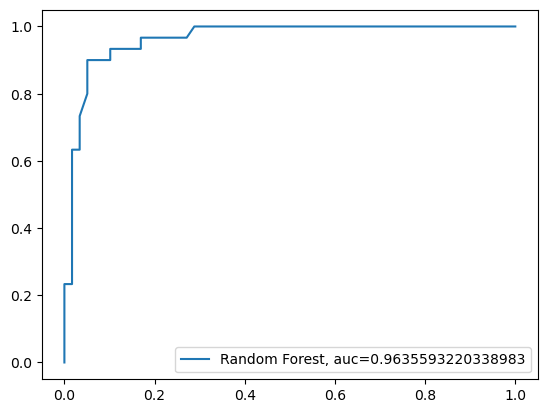

AUC-ROC score without bagging and boosting  0.9635593220338983


In [30]:

# ROC curve
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Random Forest, auc="+str(auc))
plt.legend(loc=4)
plt.show()


print('AUC-ROC score without bagging and boosting ',auc)

In [31]:
model=LGBMClassifier(num_leaves=15, learning_rate=0.01, n_estimators=400, max_depth=3,verbose=-100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('Accuracy without bagging and boosting ',metrics.accuracy_score(prediction,y_test))
print('Precision without bagging and boosting ',metrics.precision_score(y_test, prediction))
print('Recall without bagging and boosting ',metrics.recall_score(y_test, prediction))
print('F1 without bagging and boosting ',metrics.f1_score(y_test, prediction))
print('Briar score without bagging and boosting ',brier_score_loss(y_test, prediction))


Accuracy without bagging and boosting  0.8764044943820225
Precision without bagging and boosting  0.88
Recall without bagging and boosting  0.7333333333333333
F1 without bagging and boosting  0.8
Briar score without bagging and boosting  0.12359550561797752


In [32]:
# Calculate and print log loss
from sklearn.metrics import log_loss


logloss = log_loss(y_test, model.predict_proba(X_test))
print('Log Loss:', logloss)

Log Loss: 0.28234901044588645


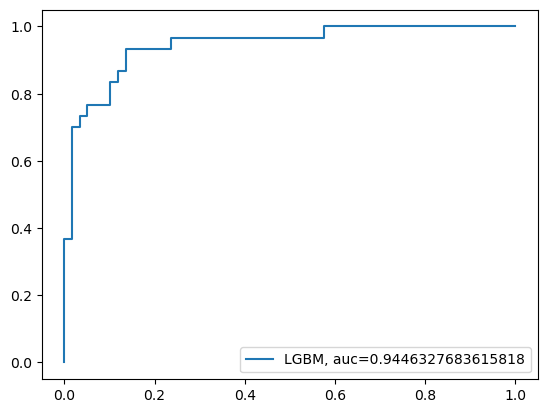

ROC-AUC score without Bagging and Boosting: 0.9446327683615818


In [33]:
# auc-roc curve
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="LGBM, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print('ROC-AUC score without Bagging and Boosting:', auc)



# Bagging and Boosting

# LGBM

In [34]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


# Base classifier
base_classifier = LGBMClassifier(num_leaves=15, learning_rate=0.01, n_estimators=400, max_depth=3,verbose=-100)

# Bagging (Bootstrap Aggregating) using BaggingClassifier
bagging_model = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)


In [35]:

# AdaBoost (Adaptive Boosting) using AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=100,  random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)


In [36]:
y_pred_adaboost

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0.])

In [37]:
print("LGBM Classifier: ")
# Evaluate the models
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

print(f'Accuracy with Bagging: {accuracy_bagging:.4f}')
print(f'Precision with Bagging: {metrics.precision_score(y_test, y_pred_bagging)}')
print(f'Recall with Bagging: {metrics.recall_score(y_test, y_pred_bagging)}')
print(f'F1 with Bagging: {metrics.f1_score(y_test, y_pred_bagging)}')
print(f'Brier score loss with Bagging: {metrics.brier_score_loss(y_test, y_pred_bagging)}')
print()


print(f'Accuracy with AdaBoost: {accuracy_adaboost:.4f}')
print(f'Precision with AdaBoost: {metrics.precision_score(y_test, y_pred_adaboost)}')
print(f'Recall with AdaBoost: {metrics.recall_score(y_test, y_pred_adaboost)}')
print(f'F1 with AdaBoost: {metrics.f1_score(y_test, y_pred_adaboost)}')
print(f'Brier score loss with AdaBoost: {metrics.brier_score_loss(y_test, y_pred_adaboost)}')



LGBM Classifier: 
Accuracy with Bagging: 0.9101
Precision with Bagging: 0.8928571428571429
Recall with Bagging: 0.8333333333333334
F1 with Bagging: 0.8620689655172413
Brier score loss with Bagging: 0.0898876404494382

Accuracy with AdaBoost: 0.8764
Precision with AdaBoost: 0.8275862068965517
Recall with AdaBoost: 0.8
F1 with AdaBoost: 0.8135593220338982
Brier score loss with AdaBoost: 0.12359550561797752


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# ... (previous code)

# ROC-AUC curve for Bagging
y_prob_bagging = bagging_model.predict_proba(X_test)[:, 1]
fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_prob_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# ROC-AUC curve for AdaBoost
y_prob_adaboost = adaboost_model.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)


In [39]:

# Print ROC-AUC scores
print(f'Area Under the Curve for Bagging: {roc_auc_bagging:.4f}')
print(f'Area Under the Curve for AdaBoost: {roc_auc_adaboost:.4f}')



Area Under the Curve for Bagging: 0.9548
Area Under the Curve for AdaBoost: 0.9554


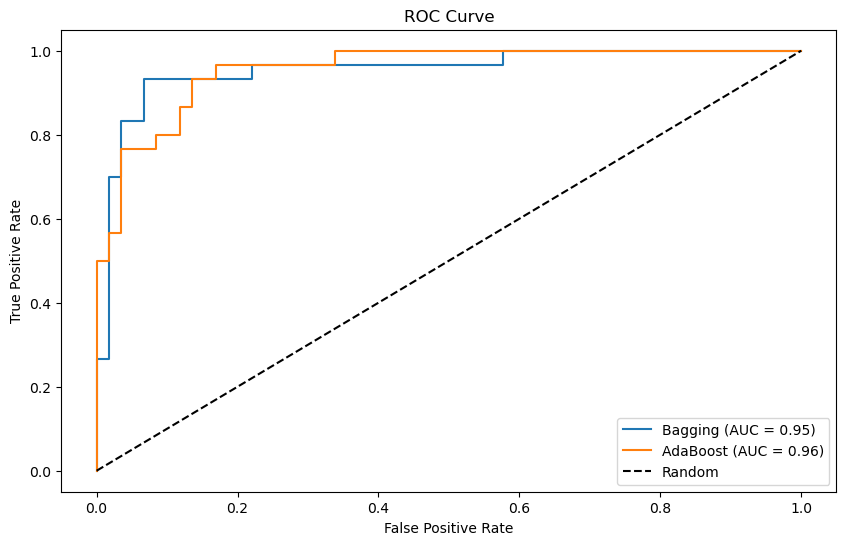

In [40]:

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_bagging, tpr_bagging, label=f'Bagging (AUC = {roc_auc_bagging:.2f})')
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {roc_auc_adaboost:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


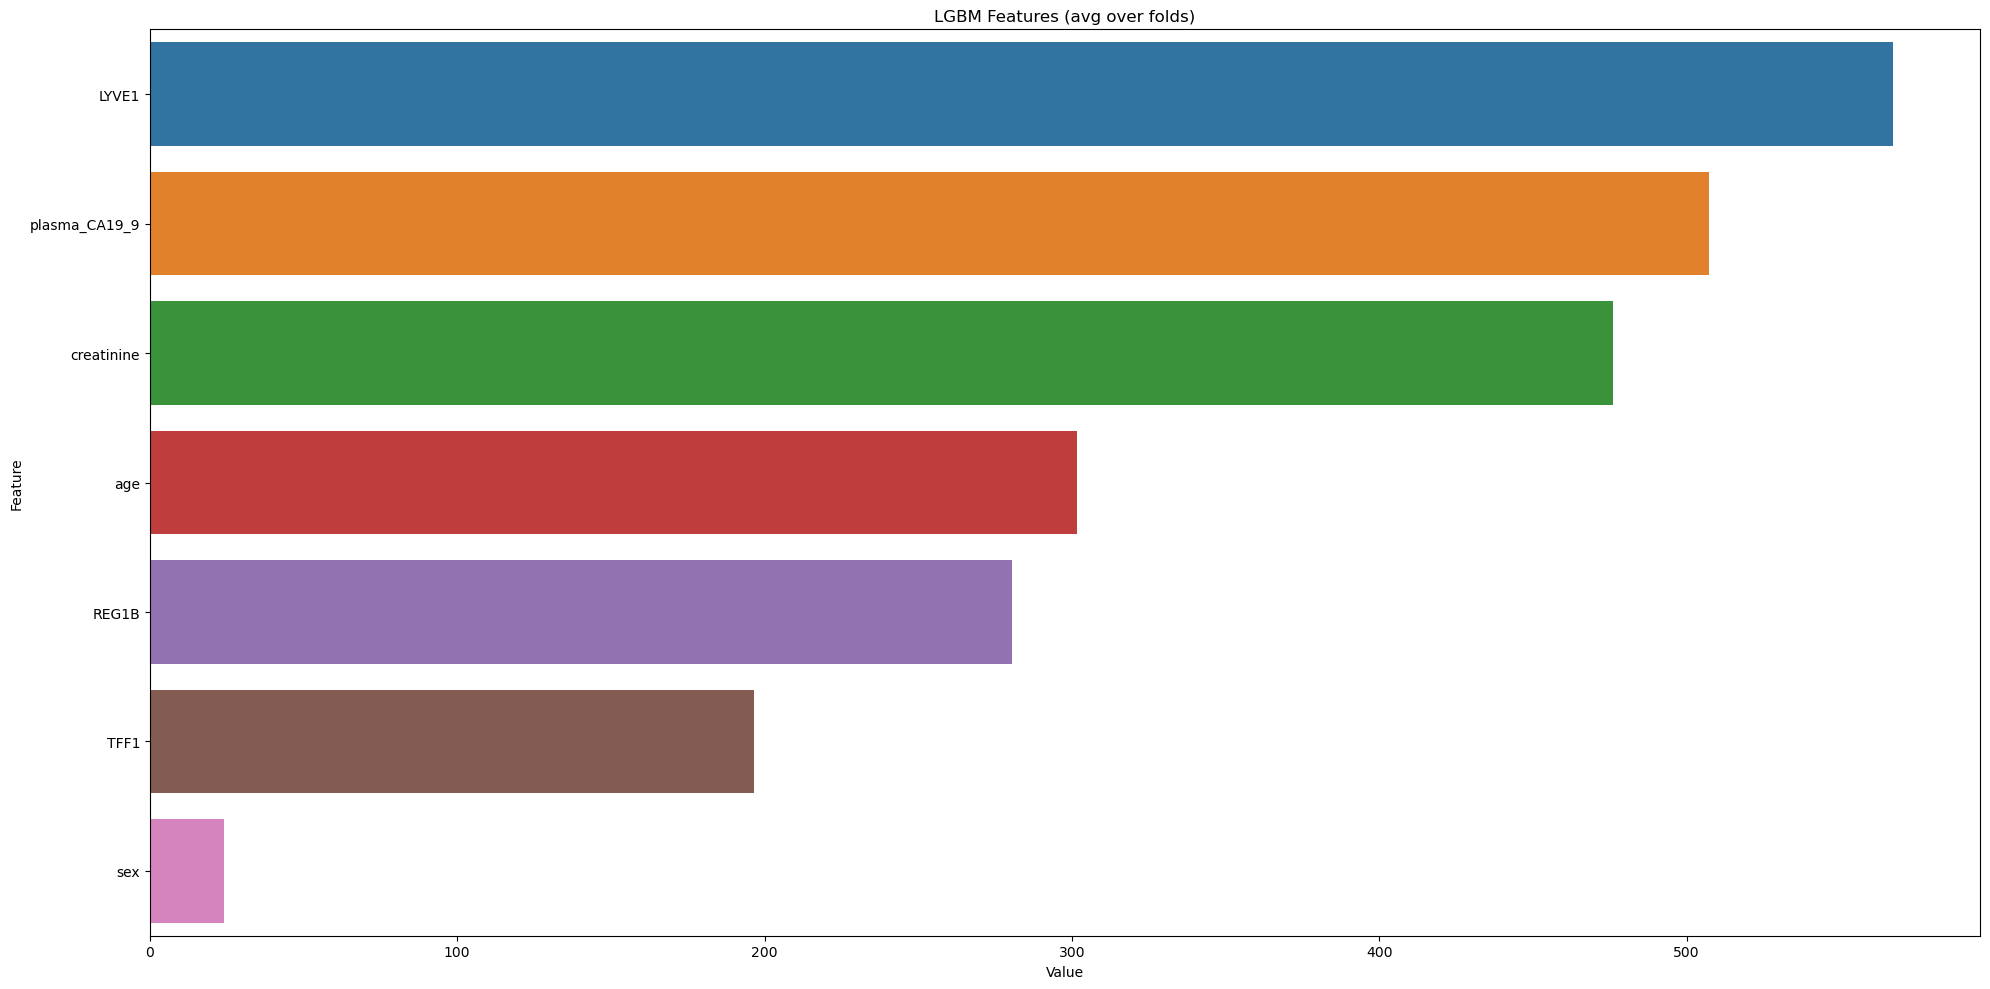

In [41]:


feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_model.estimators_
], axis=0)

feature_imp = pd.DataFrame(sorted(zip(feature_importances, X.columns)), columns=['Value', 'Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features (avg over folds)')
plt.tight_layout()
plt.show()


In [42]:
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your predicted probabilities (y_prob_bagging, y_prob_adaboost) and true labels (y_test)

# Calculate cross-entropy loss
loss_bagging = log_loss(y_test, y_prob_bagging)
loss_adaboost = log_loss(y_test, y_prob_adaboost)


# Print the information loss
print(f'Information Loss (Cross-Entropy) for Bagging: {loss_bagging:.4f}')
print(f'Information Loss (Cross-Entropy) for AdaBoost: {loss_adaboost:.4f}')


Information Loss (Cross-Entropy) for Bagging: 0.2637
Information Loss (Cross-Entropy) for AdaBoost: 0.3748


#  predicted probabilities distribution 

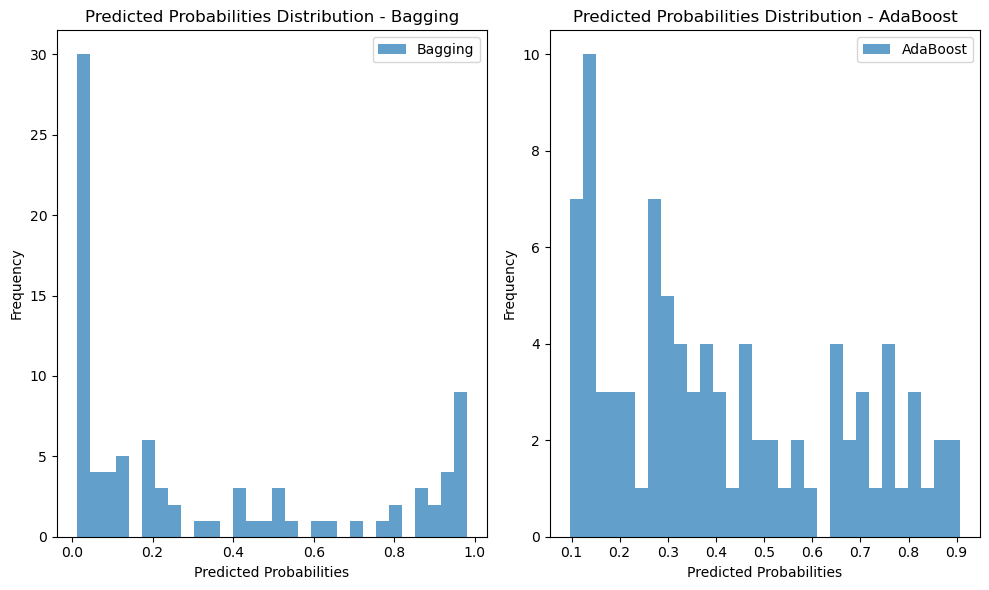

In [43]:

# Plot the predicted probabilities distribution
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(y_prob_bagging, bins=30, label='Bagging', alpha=0.7)
plt.title('Predicted Probabilities Distribution - Bagging')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_prob_adaboost, bins=30, label='AdaBoost', alpha=0.7)
plt.title('Predicted Probabilities Distribution - AdaBoost')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


# Random Forest

In [44]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


# Base classifier
base_classifier = RandomForestClassifier()

# Bagging (Bootstrap Aggregating) using BaggingClassifier
bagging_model = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)


In [45]:

# AdaBoost (Adaptive Boosting) using AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=100,  random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)


In [46]:

# Evaluate the models
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

print(f'Accuracy with Bagging: {accuracy_bagging:.4f}')
print(f'Precision with Bagging: {metrics.precision_score(y_test, y_pred_bagging)}')
print(f'Recall with Bagging: {metrics.recall_score(y_test, y_pred_bagging)}')
print(f'F1 with Bagging: {metrics.f1_score(y_test, y_pred_bagging)}')
print(f'Brier score loss with Bagging: {metrics.brier_score_loss(y_test, y_pred_bagging)}')
print()
print(f'Accuracy with AdaBoost: {accuracy_adaboost:.4f}')
print(f'Precision with AdaBoost: {metrics.precision_score(y_test, y_pred_adaboost)}')
print(f'Recall with AdaBoost: {metrics.recall_score(y_test, y_pred_adaboost)}')
print(f'F1 with AdaBoost: {metrics.f1_score(y_test, y_pred_adaboost)}')
print(f'Brier score loss with AdaBoost: {metrics.brier_score_loss(y_test, y_pred_adaboost)}')

Accuracy with Bagging: 0.9213
Precision with Bagging: 0.9259259259259259
Recall with Bagging: 0.8333333333333334
F1 with Bagging: 0.8771929824561403
Brier score loss with Bagging: 0.07865168539325842

Accuracy with AdaBoost: 0.9101
Precision with AdaBoost: 0.8928571428571429
Recall with AdaBoost: 0.8333333333333334
F1 with AdaBoost: 0.8620689655172413
Brier score loss with AdaBoost: 0.0898876404494382


In [47]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


# ROC-AUC curve for Bagging
y_prob_bagging = bagging_model.predict_proba(X_test)[:, 1]
fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_prob_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# ROC-AUC curve for AdaBoost
y_prob_adaboost = adaboost_model.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)


# Print ROC-AUC scores
print(f'ROC-AUC for Bagging: {roc_auc_bagging:.4f}')
print(f'ROC-AUC for AdaBoost: {roc_auc_adaboost:.4f}')



ROC-AUC for Bagging: 0.9605
ROC-AUC for AdaBoost: 0.9630


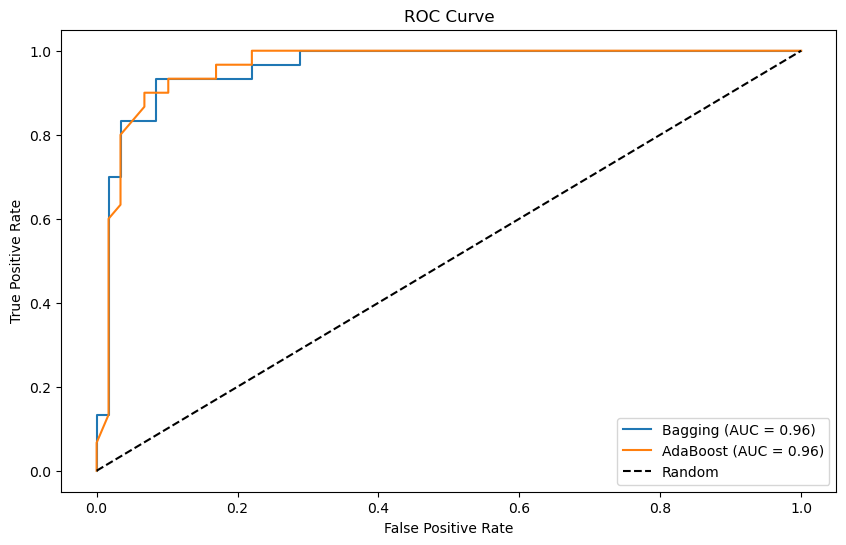

In [48]:

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_bagging, tpr_bagging, label=f'Bagging (AUC = {roc_auc_bagging:.2f})')
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {roc_auc_adaboost:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your predicted probabilities (y_prob_bagging, y_prob_adaboost) and true labels (y_test)

# Calculate cross-entropy loss
loss_bagging = log_loss(y_test, y_prob_bagging)
loss_adaboost = log_loss(y_test, y_prob_adaboost)


# Print the information loss
print(f'Information Loss (Cross-Entropy) for Bagging: {loss_bagging:.4f}')
print(f'Information Loss (Cross-Entropy) for AdaBoost: {loss_adaboost:.4f}')


Information Loss (Cross-Entropy) for Bagging: 0.2596
Information Loss (Cross-Entropy) for AdaBoost: 0.2491


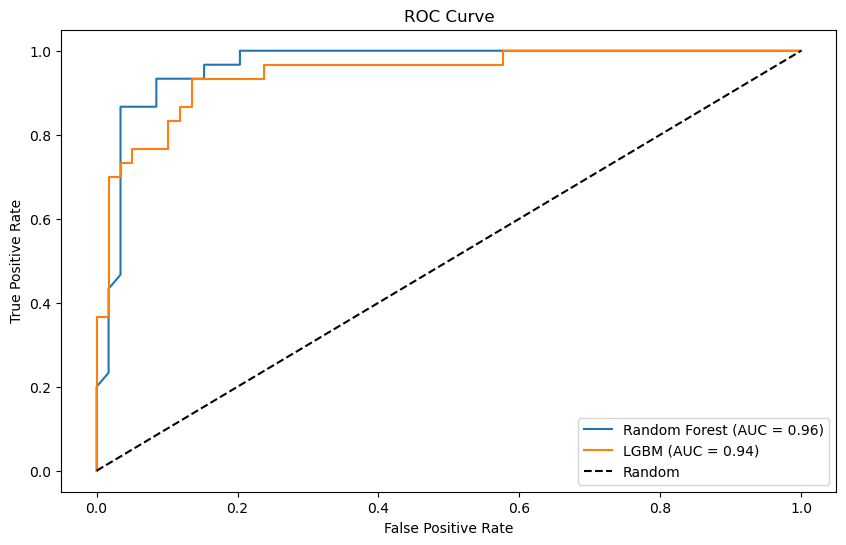

In [50]:
# Compare the ROC curves of the two models
model1 = RandomForestClassifier()
model2 = LGBMClassifier(num_leaves=15, learning_rate=0.01, n_estimators=400, max_depth=3,verbose=-100)

# Fit the models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Get the predicted probabilities
y_prob1 = model1.predict_proba(X_test)[:, 1]
y_prob2 = model2.predict_proba(X_test)[:, 1]

# Get the false positive rate, true positive rate and threshold
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_prob1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob2)

# Get the area under the curve
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

# Plot the ROC curve

plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, label=f'Random Forest (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'LGBM (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

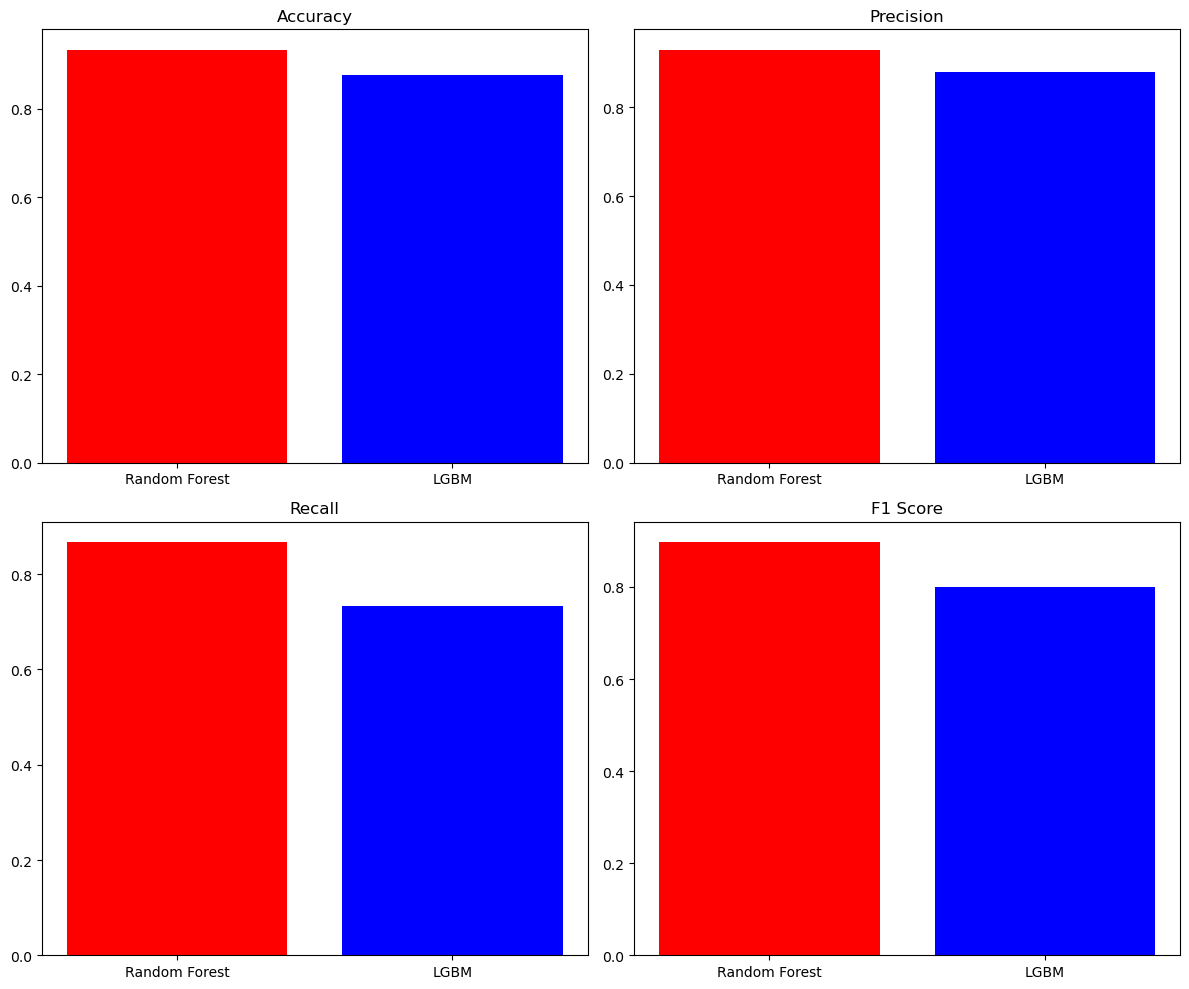

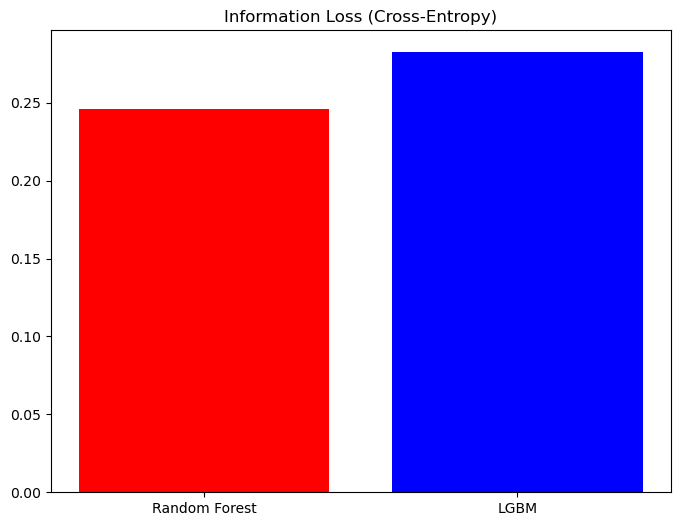

In [51]:
# Get the predicted labels
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Get the predicted probabilities
y_prob1 = model1.predict_proba(X_test)[:, 1]
y_prob2 = model2.predict_proba(X_test)[:, 1]

# Get the accuracy score
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)

# Get the precision score
precision1 = metrics.precision_score(y_test, y_pred1)
precision2 = metrics.precision_score(y_test, y_pred2)

# Get the recall score
recall1 = metrics.recall_score(y_test, y_pred1)
recall2 = metrics.recall_score(y_test, y_pred2)

# Get the F1 score
f1_1 = metrics.f1_score(y_test, y_pred1)
f1_2 = metrics.f1_score(y_test, y_pred2)

# Get the information loss
loss1 = log_loss(y_test, y_prob1)
loss2 = log_loss(y_test, y_prob2)

# Plot the metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Accuracy
axes[0, 0].bar(['Random Forest', 'LGBM'], [accuracy1, accuracy2], color=['red', 'blue'])
axes[0, 0].set_title('Accuracy')

# Precision
axes[0, 1].bar(['Random Forest', 'LGBM'], [precision1, precision2], color=['red', 'blue'])
axes[0, 1].set_title('Precision')

# Recall
axes[1, 0].bar(['Random Forest', 'LGBM'], [recall1, recall2], color=['red', 'blue'])
axes[1, 0].set_title('Recall')

# F1 Score
axes[1, 1].bar(['Random Forest', 'LGBM'], [f1_1, f1_2], color=['red', 'blue'])
axes[1, 1].set_title('F1 Score')

plt.tight_layout()
plt.show()

# Plot Information Loss
plt.figure(figsize=(8, 6))
plt.bar(['Random Forest', 'LGBM'], [loss1, loss2], color=['red', 'blue'])
plt.title('Information Loss (Cross-Entropy)')
plt.show()